In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.font_manager import FontProperties

# Настройка стиля и палитры
green_palette = ["#1a5f31", "#2a7d45", "#3c9e5a", "#55bd70", "#6edc85", "#8af49c"]
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Montserrat', 'DejaVu Sans', 'Arial', 'sans-serif']
plt.rcParams['font.weight'] = 'regular'
plt.rcParams['figure.figsize'] = (12, 8)

# Чтение данных с правильным разделителем
data = pd.read_csv('Online ecom (1).csv', sep=';', header=None)

# Присваиваем названия колонкам
columns = ['CID', 'TID', 'Gender', 'Age Group', 'Purchase Date', 'Product Category', 
           'Discount Availed', 'Discount Name', 'Discount Amount (INR)', 'Gross Amount', 
           'Net Amount', 'Purchase Method', 'Location']
data.columns = columns

# Функция для очистки и преобразования числовых значений
def clean_numeric_values(df, column):
    # Удаляем пробелы и заменяем запятые на точки
    df[column] = df[column].astype(str).str.replace(',', '.').str.strip()
    # Преобразуем в float, ошибки преобразования становятся NaN
    df[column] = pd.to_numeric(df[column], errors='coerce')
    # Заменяем отрицательные значения и NaN на 0 или медиану
    median_value = df[column].median()
    df[column] = df[column].fillna(median_value)
    df[column] = df[column].apply(lambda x: max(x, 0))  # делаем все значения неотрицательными
    return df

# Обработка числовых столбцов
for col in ['Discount Amount (INR)', 'Gross Amount', 'Net Amount']:
    data = clean_numeric_values(data, col)

# Обработка категориальных столбцов
data['Discount Availed'] = data['Discount Availed'].map({'Yes': True, 'No': False}).fillna(False)
data['Discount Name'] = data['Discount Name'].fillna('No Coupon')
data['Purchase Date'] = pd.to_datetime(data['Purchase Date'], format='%d.%m.%Y %H:%M', errors='coerce')
data['Purchase Month'] = data['Purchase Date'].dt.to_period('M').astype(str)

C:\Users\tg082\AppData\Local\Temp\ipykernel_23532\4261066856.py:41: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Discount Availed'] = data['Discount Availed'].map({'Yes': True, 'No': False}).fillna(False)


In [38]:
data.head()

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location,Purchase Month
0,CID,TID,Gender,Age Group,NaT,Product Category,False,Discount Name,0.00,2954.266150,2814.910875,Purchase Method,Location,NaT
1,943146,5876328741,Female,25-45,2023-08-30 20:27:00,Electronics,True,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad,2023-08
2,180079,1018503182,Male,25-45,2024-02-23 09:33:00,Electronics,True,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore,2024-02
3,337580,3814082218,Female,60 and above,2022-03-06 09:09:00,Clothing,True,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi,2022-03
4,180333,1395204173,Male,60 and above,2020-11-04 04:41:00,Sports & Fitness,False,No Coupon,0.00,5695.612650,5695.612650,Debit Card,Delhi,2020-11


In [39]:
data['Location'].value_counts()
data['Discount Name'].unique()

array(['Discount Name', 'FESTIVE50', 'SEASONALOFFER21', 'No Coupon',
       'WELCOME5', 'SAVE10', 'NEWYEARS'], dtype=object)

# Присваиваем названия колонкам

In [41]:
data['Net Amount'].min()

np.float64(0.0)

In [42]:
# Преобразование строковых числовых значений в float
def convert_to_float(x):
    if isinstance(x, str):
        # Удаляем возможные пробелы и заменяем запятые на точки
        x = x.strip().replace(',', '.')
        try:
            return float(x)
        except ValueError:
            return np.nan
    return float(x) if not pd.isna(x) else np.nan

# Применяем преобразование к числовым столбцам
numeric_columns = ['Discount Amount (INR)', 'Gross Amount', 'Net Amount']
for col in numeric_columns:
    data[col] = data[col].apply(convert_to_float)

data = data[data['Net Amount'] >= 0]
data = data[data['Gross Amount'] >= 0]

data['Discount Availed'] = data['Discount Availed'].map({'Yes': True, 'No': False})
data['Discount Name'] = data['Discount Name'].fillna('No Coupon')
data['Purchase Date'] = pd.to_datetime(data['Purchase Date'], format='%d.%m.%Y %H:%M', errors='coerce')
data['Purchase Month'] = data['Purchase Date'].dt.to_period('M')

# 1. Сравнение среднего чека: с купонами vs без купонов

ValueError: Axis limits cannot be NaN or Inf

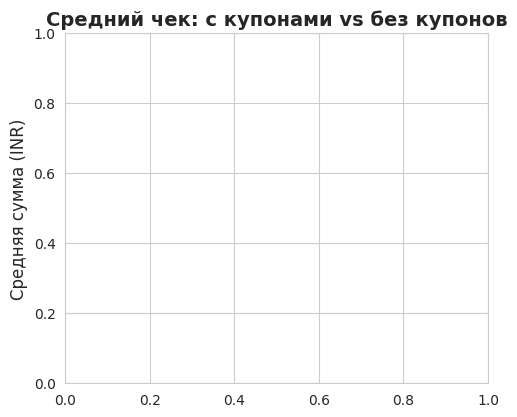

In [44]:
plt.figure(figsize=(12, 10))

# 1. Сравнение среднего чека: с купонами vs без купонов
plt.subplot(2, 2, 1)
coupon_comparison = data.groupby('Discount Availed')['Net Amount'].mean().reset_index()
coupon_comparison['Discount Availed'] = coupon_comparison['Discount Availed'].map({True: 'С купоном', False: 'Без купона'})

bar_plot = sns.barplot(x='Discount Availed', y='Net Amount', data=coupon_comparison, palette=[green_palette[1], green_palette[3]])
plt.title('Средний чек: с купонами vs без купонов', fontsize=14, fontweight='bold')
plt.ylabel('Средняя сумма (INR)', fontsize=12)
plt.xlabel('')
plt.ylim(0, coupon_comparison['Net Amount'].max() * 1.2)
# Добавляем значения на столбцы
for i, v in enumerate(coupon_comparison['Net Amount']):
    bar_plot.text(i, v + 100, f'{v:.0f}', ha='center', fontweight='bold', fontsize=12)

# 2. Эффективность купонов по типам